Machine Learning Assignment1

Get Data

In [1]:
train_link="https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_Train.csv"
test_link="https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_test.csv"

In [2]:
import numpy as np
import pandas as pd

data_train1=pd.read_csv(train_link)
data_test1=pd.read_csv(test_link)
data_train1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


In [3]:
# Check no of rows & columns in the training dataset
print("Shape of the data :", data_train1.shape)

# See all the columns in the dataset
print("All columns are :", list(data_train1.columns))

Shape of the data : (800, 9)
All columns are : ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength']


In [4]:
# check the datatypes and count of not-null values in each columns
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


There are 800 instances in the training dataset,We can see here that No columns has even a single null value or NaN

In [5]:
# describe() works on whole DataFrame (pandas dataset object) and prints important staistical information
data_train1.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,292.533625,67.819125,47.81125,179.77925,5.693500,985.551875,778.426250,49.69625,36.654187
std,103.719988,86.017377,61.53907,22.18845,6.264438,72.783248,82.670454,69.13960,17.623053
min,102.000000,0.000000,0.00000,121.80000,0.000000,801.000000,594.000000,1.00000,2.330000
25%,212.100000,0.000000,0.00000,162.00000,0.000000,938.000000,746.600000,7.00000,23.242500
50%,277.050000,19.000000,0.00000,184.00000,5.250000,974.000000,780.650000,28.00000,35.340000
75%,374.000000,129.800000,117.50000,192.00000,10.200000,1046.925000,839.525000,56.00000,48.880000
max,540.000000,359.400000,174.70000,228.00000,32.200000,1145.000000,992.600000,365.00000,82.600000


The count,mean,std,min and max are self Explanatory.The 25%,50%,75% rows shows the corresponding percentiles.
for example:25% of the materials are less then 7 years old.while 50% are less than 28 and 75 % are less than
56.

In [6]:
data_train1["age"].value_counts()

age
28     213
3      131
7      120
56      91
14      60
100     52
90      51
180     24
91      22
365     14
270     12
360      5
120      3
1        2
Name: count, dtype: int64

In [7]:
data_train1["age"].median()

28.0

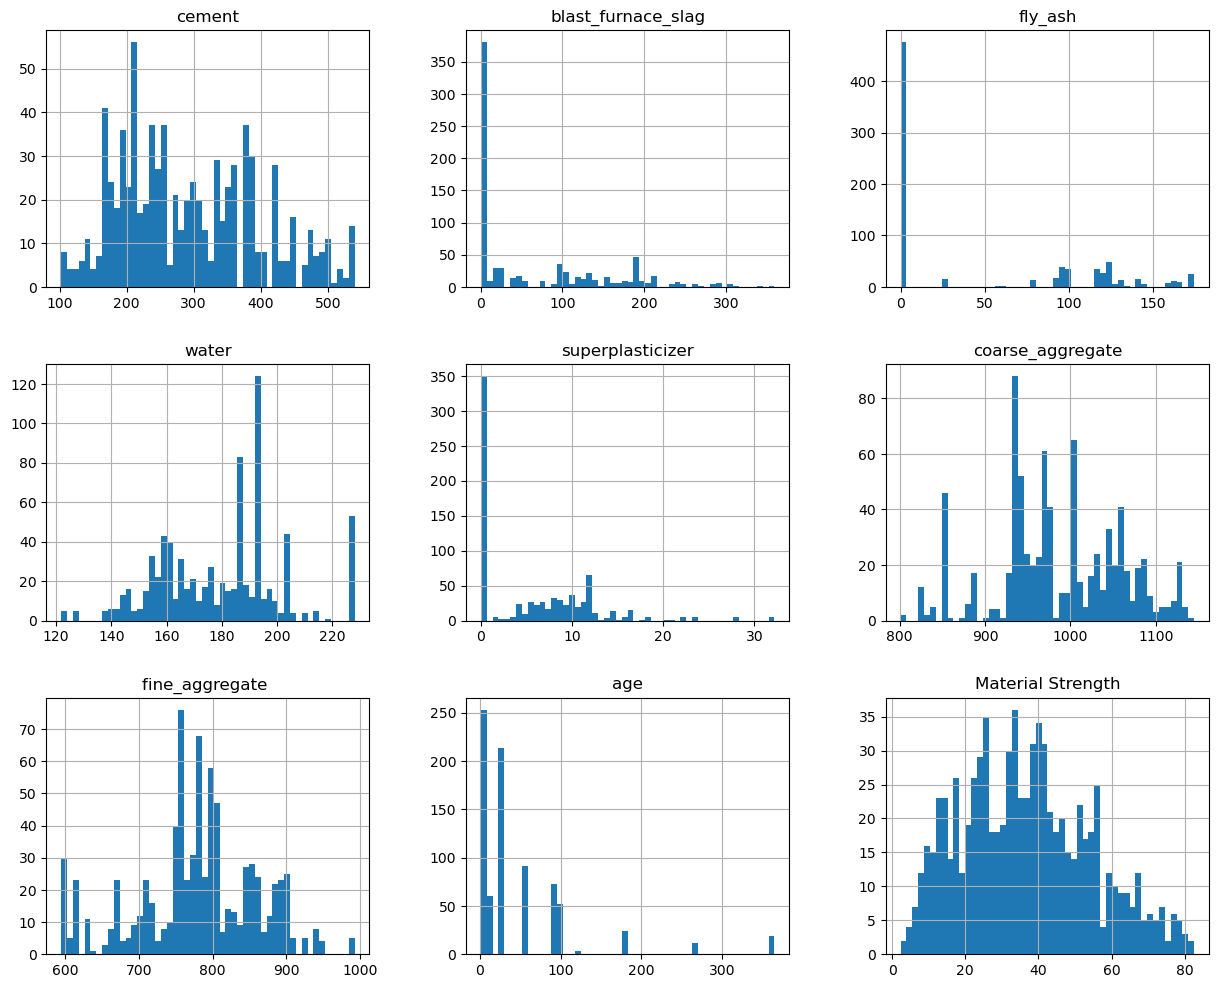

In [8]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt
data_train=data_train1.copy()
# DataFrame.hist() creates histogram of every feature present in the DataFrame.
data_train.hist(bins=50, figsize=(15,12))

plt.show()

Notice a few things histograms:

1.Many histogrames are tail heavy:age,superplasticizer,blast_furnance_slag,fly_ash extend much faster to the left of median than to the right.This may make it a bit harder for some Machine Learning algorithms to detect patterns.We will try transforming these attributes later on to have more bell-shaped distributions.

2.If we focus on the age graph it is showing 250 counts nearest to zero but nearest zero value is 1 whose count is 2 so let's view age graph in a broad view.

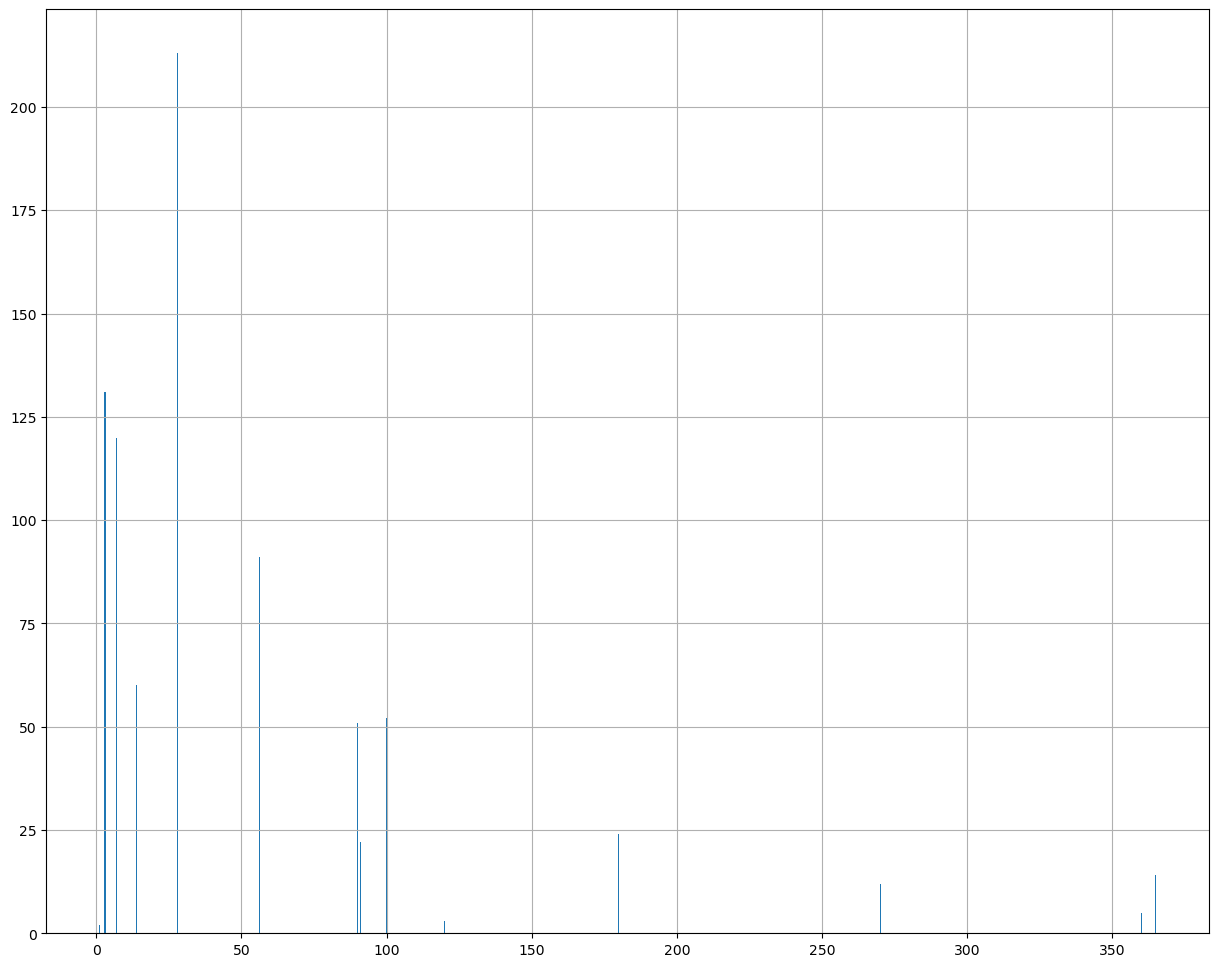

In [9]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt
# DataFrame.hist() creates histogram of every feature present in the DataFrame.
data_train["age"].hist(bins=1000, figsize=(15,12))

plt.show()

Let's find the correlation matrix



In [10]:
#Here we are using Pearson correlation coefficient.
#corr() automatically calculates correlation for every pair of attributes
corr_matrix=data_train.corr()
corr_matrix

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
cement,1.000000,-0.207007,-0.344930,-0.052637,0.239871,-0.280034,-0.289854,0.049899,0.470882
blast_furnace_slag,-0.207007,1.000000,-0.413947,0.111956,-0.009954,-0.263807,-0.291447,-0.017040,0.128704
fly_ash,-0.344930,-0.413947,1.000000,-0.402815,0.329412,0.188602,0.181276,-0.143028,-0.015736
water,-0.052637,0.111956,-0.402815,1.000000,-0.769979,-0.102044,-0.464590,0.330822,-0.298688
superplasticizer,0.239871,-0.009954,0.329412,-0.769979,1.000000,-0.222680,0.290716,-0.175616,0.466865
coarse_aggregate,-0.280034,-0.263807,0.188602,-0.102044,-0.222680,1.000000,-0.209472,-0.065710,-0.214502
fine_aggregate,-0.289854,-0.291447,0.181276,-0.464590,0.290716,-0.209472,1.000000,-0.197211,-0.188004
age,0.049899,-0.017040,-0.143028,0.330822,-0.175616,-0.065710,-0.197211,1.000000,0.339825
Material Strength,0.470882,0.128704,-0.015736,-0.298688,0.466865,-0.214502,-0.188004,0.339825,1.000000


In [11]:
#Lets see the most correlated features to "Material Strength"
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
cement                0.470882
superplasticizer      0.466865
age                   0.339825
blast_furnace_slag    0.128704
fly_ash              -0.015736
fine_aggregate       -0.188004
coarse_aggregate     -0.214502
water                -0.298688
Name: Material Strength, dtype: float64

Let's find all the columns which contains zeros

In [12]:
columns=data_train.copy()
features_with_zeros = []
for i in columns:
    dic = (columns[i].value_counts())
    for x in dic.keys():
        if x == 0 :
            # print(dic[x])
            features_with_zeros.append(i)
features_with_zeros

['blast_furnace_slag', 'fly_ash', 'superplasticizer']

In [13]:
data_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


In [14]:
import pandas as pd 
import numpy as np
# df = pd. DataFrame({'A': [1, 2, 3, 4, 5], 'B': [0, 3, 0, 5, 0], 'C': [0, 0, 0, 0, 0]})

columns. replace(0, np. nan, inplace=True)
median_values = columns. median()
columns. fillna(median_values, inplace=True)
columns
# data_train=columns

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,124.1,121.4,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,124.1,121.4,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,121.4,228.0,9.7,932.0,594.0,270,40.27
3,332.5,142.5,121.4,228.0,9.7,932.0,594.0,365,41.05
4,198.6,132.4,121.4,192.0,9.7,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,124.1,121.4,189.0,9.7,1125.0,613.0,180,61.92
796,500.0,124.1,121.4,200.0,9.7,1125.0,613.0,90,47.22
797,500.0,124.1,121.4,200.0,9.7,1125.0,613.0,180,51.04
798,500.0,124.1,121.4,200.0,9.7,1125.0,613.0,270,55.16


Let's find correlation after replacing zeros of all the columns by corresponding median of that column

In [15]:
#Here we are using Pearson correlation coefficient.
#corr() automatically calculates correlation for every pair of attributes
corr_matrix_without_zeros=columns.corr()
corr_matrix_without_zeros

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
cement,1.000000,-0.231353,-0.136502,-0.052637,0.345721,-0.280034,-0.289854,0.049899,0.470882
blast_furnace_slag,-0.231353,1.000000,-0.001651,0.203125,0.055231,0.027261,-0.199302,-0.015238,-0.059559
fly_ash,-0.136502,-0.001651,1.000000,-0.039516,-0.014018,0.014307,-0.098051,0.016565,-0.058049
water,-0.052637,0.203125,-0.039516,1.000000,-0.404924,-0.102044,-0.464590,0.330822,-0.298688
superplasticizer,0.345721,0.055231,-0.014018,-0.404924,1.000000,-0.278076,0.173319,-0.014061,0.292805
coarse_aggregate,-0.280034,0.027261,0.014307,-0.102044,-0.278076,1.000000,-0.209472,-0.065710,-0.214502
fine_aggregate,-0.289854,-0.199302,-0.098051,-0.464590,0.173319,-0.209472,1.000000,-0.197211,-0.188004
age,0.049899,-0.015238,0.016565,0.330822,-0.014061,-0.065710,-0.197211,1.000000,0.339825
Material Strength,0.470882,-0.059559,-0.058049,-0.298688,0.292805,-0.214502,-0.188004,0.339825,1.000000


In [16]:
#Lets see the most correlated features to "Material Strength"
corr_matrix_without_zeros["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
cement                0.470882
age                   0.339825
superplasticizer      0.292805
fly_ash              -0.058049
blast_furnace_slag   -0.059559
fine_aggregate       -0.188004
coarse_aggregate     -0.214502
water                -0.298688
Name: Material Strength, dtype: float64

Let's visualize all the outliers of each columns 

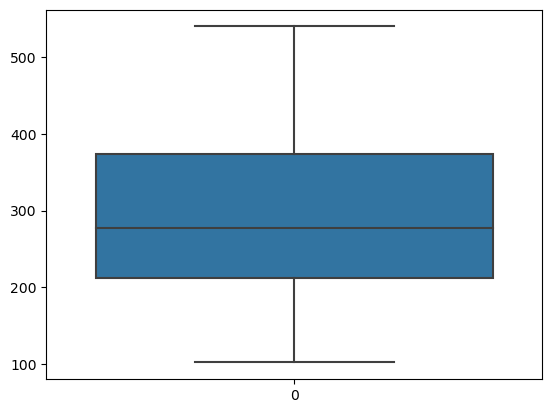

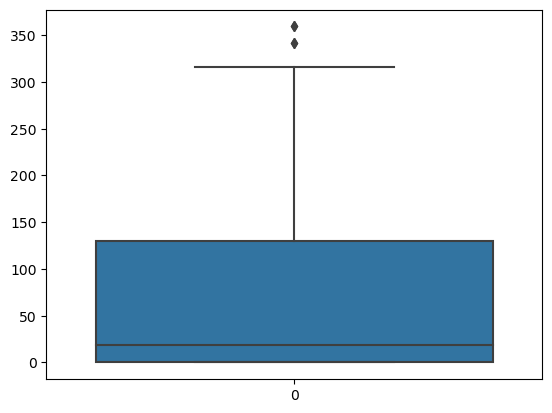

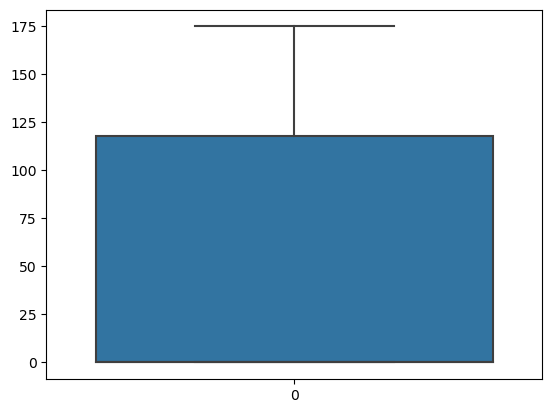

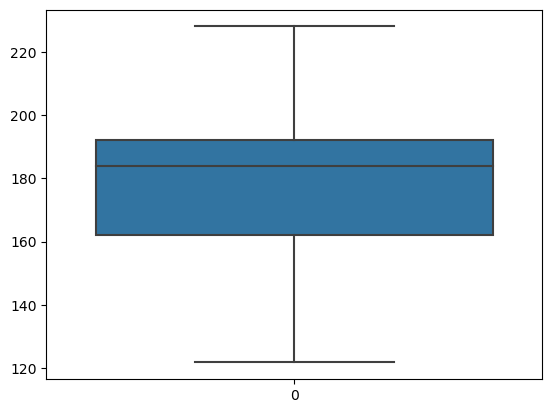

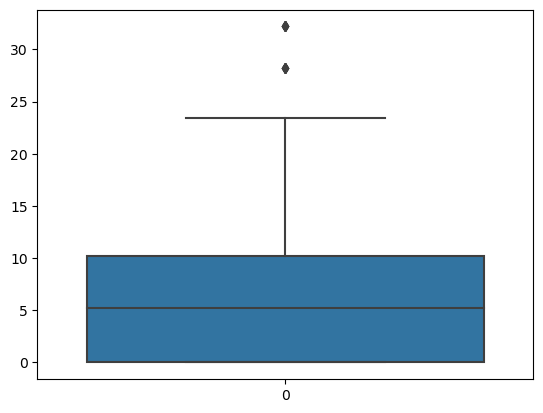

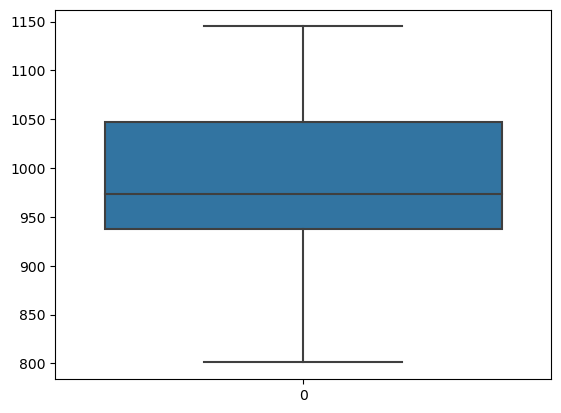

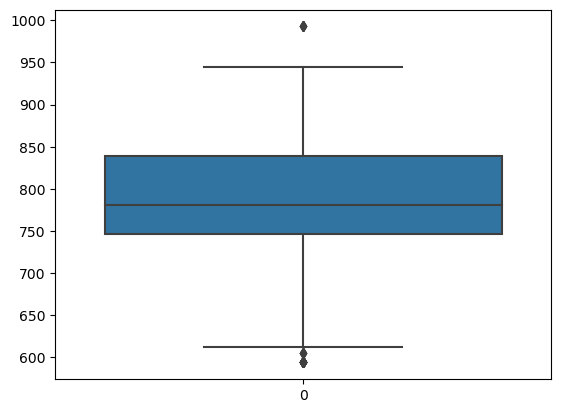

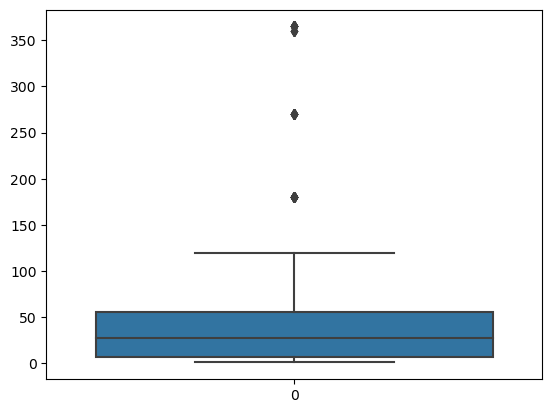

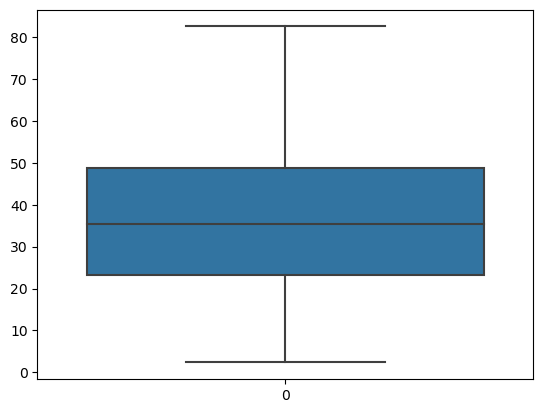

In [17]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
 
# Load the dataset
# without_outlier=data_train.copy()
# without_outlier.shape
# Create the dataframe
for feature in data_train:
    import seaborn as sns
    sns.boxplot(data_train[feature])
    plt.show()

Remove Outliers

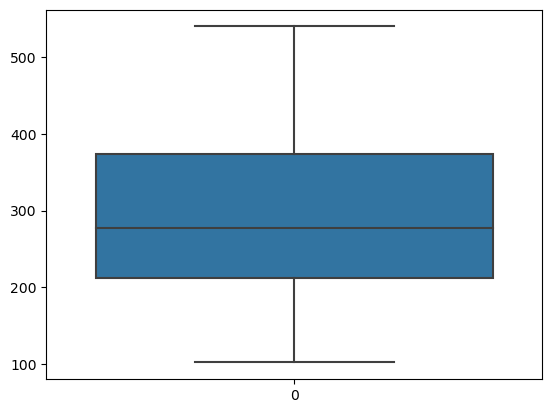

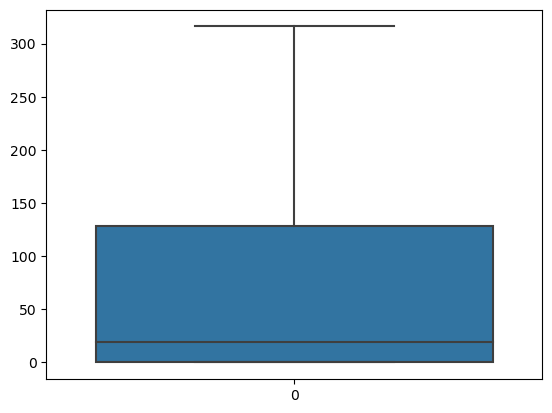

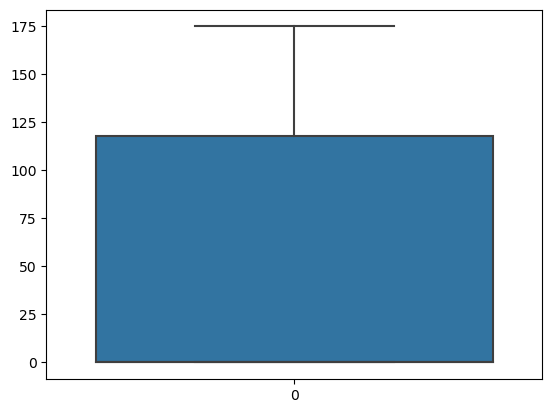

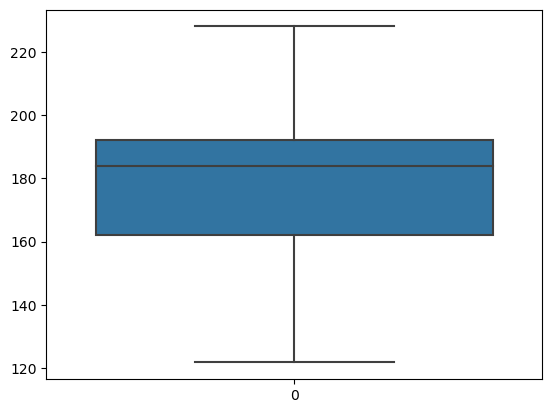

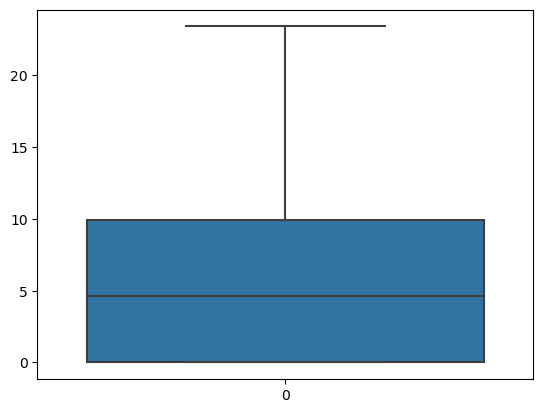

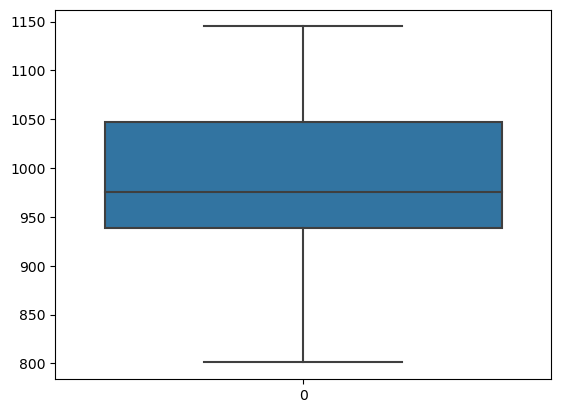

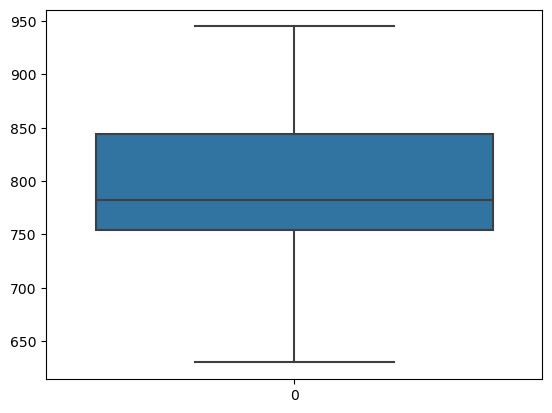

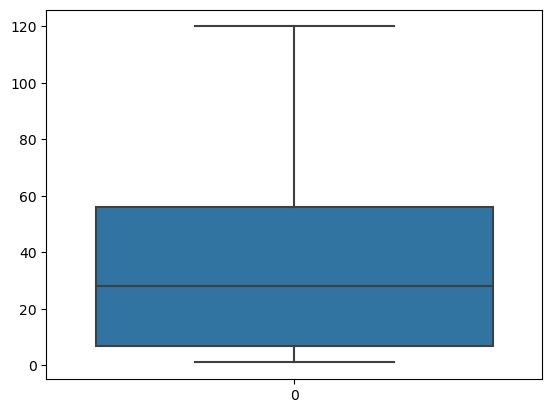

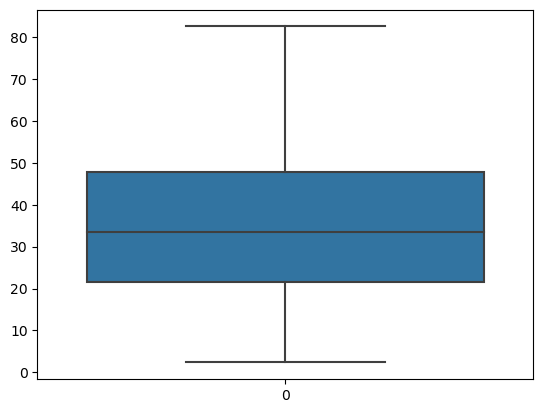

New Shape:  (688, 9)


In [18]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
 
# Load the dataset
without_outlier=data_train.copy()
without_outlier.shape
# Create the dataframe
for feature in without_outlier.columns:
#     print("Old Shape: ", without_outlier[feature].shape)
    
    ''' Detection '''
    # IQR
    # Calculate the upper and lower limits
    Q1 = without_outlier[feature].quantile(0.25)
    Q3 = without_outlier[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
     
    # Create arrays of Boolean values indicating the outlier rows
    # upper_array = np.where(without_outlier[feature]>=upper)[0]
    # lower_array = np.where(without_outlier[feature]<=lower)[0]
    without_outlier=without_outlier[without_outlier[feature]<upper]
    without_outlier=without_outlier[without_outlier[feature]>lower]
     
    # Removing the outliers
    # without_outlier.drop(index=upper_array, inplace=True)
    # without_outlier.drop(index=lower_array, inplace=True)
   
    
    # Box Plot
    import seaborn as sns
    sns.boxplot(without_outlier[feature])
    plt.show()
    # Print the new shape of the DataFrame
print("New Shape: ", without_outlier.shape)

In [56]:
data_train=without_outlier.copy()

In [57]:
data_train["age_bfs"]=data_train["superplasticizer"]/data_train["water"]
data_train["cem_fly_ash"]=data_train["cement"]+data_train["fly_ash"]
data_train["cem_super_age"]=data_train["cement"]+data_train["superplasticizer"]+data_train["age"]
data_train["cem_super_water"]=data_train["cement"]+data_train["superplasticizer"]-data_train["water"]

In [58]:
data_train["water_cement_ratio"]=data_train["cement"]/data_train["water"]
data_train["course_fine_ratio"]=data_train["coarse_aggregate"]/data_train["fine_aggregate "]
data_train["water_cem_fly_ash"]=data_train["water"]/(data_train["cement"]+data_train["fly_ash"])
data_train["blast_age"]=data_train["blast_furnace_slag"]*data_train["age"]
data_train['age_fly_blast_cement']= data_train["age"]*(data_train["fly_ash"]+data_train["blast_furnace_slag"]+data_train["cement"])

In [59]:
fly_ash_mean=data_train["fly_ash"].mean()
fly_ash_mean

55.594476744186046

In [60]:
data_train["aggregate_cement_ratio"]=data_train["course_fine_ratio"]/data_train["cement"]
data_train['fly_ash_mean'] = data_train["fly_ash"].replace([0],fly_ash_mean)
data_train["fly_blast"]=data_train["fly_ash"]+data_train["blast_furnace_slag"]+data_train["cement"]
data_train["water_by_fly_blast"]=data_train['water']/(data_train["fly_ash"]+data_train["blast_furnace_slag"]+data_train["cement"])
data_train['age_watercementratio']=data_train['age']/(data_train["water_by_fly_blast"])

In [61]:
# data_train["blast_fly"]=data_train["blast_furnace_slag"]/data_train["fly_ash"]

<AxesSubplot:>

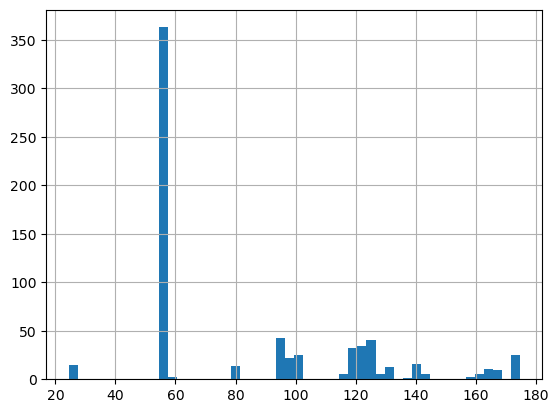

In [62]:
data_train["fly_ash_mean"].hist(bins=50)

In [63]:
import pandas as pd 
import numpy as np
# df = pd. DataFrame({'A': [1, 2, 3, 4, 5], 'B': [0, 3, 0, 5, 0], 'C': [0, 0, 0, 0, 0]})
data_train_median=data_train.copy()
data_train_median. replace(0, np. nan, inplace=True)
median_values = data_train_median. median()
data_train_median. fillna(median_values, inplace=True)
data_train_median
# data_train=columns

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,age_bfs,...,water_cement_ratio,course_fine_ratio,water_cem_fly_ash,blast_age,age_fly_blast_cement,aggregate_cement_ratio,fly_ash_mean,fly_blast,water_by_fly_blast,age_watercementratio
0,540.0,124.1,121.4,162.0,2.5,1040.0,676.0,28,79.99,0.015432,...,3.333333,1.538462,0.300000,1474.9,15120.0,0.002849,55.594477,540.0,0.300000,93.333333
1,540.0,124.1,121.4,162.0,2.5,1055.0,676.0,28,61.89,0.015432,...,3.333333,1.560651,0.300000,1474.9,15120.0,0.002890,55.594477,540.0,0.300000,93.333333
5,266.0,114.0,121.4,228.0,9.5,932.0,670.0,90,47.03,0.056039,...,1.166667,1.391045,0.857143,10260.0,34200.0,0.005229,55.594477,380.0,0.600000,150.000000
8,266.0,114.0,121.4,228.0,9.5,932.0,670.0,28,45.85,0.056039,...,1.166667,1.391045,0.857143,3192.0,10640.0,0.005229,55.594477,380.0,0.600000,46.666667
10,198.6,132.4,121.4,192.0,9.5,978.4,825.5,90,38.07,0.056039,...,1.034375,1.185221,0.966767,11916.0,29790.0,0.005968,55.594477,331.0,0.580060,155.156250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,331.0,124.1,121.4,192.0,9.5,978.0,825.0,90,37.23,0.056039,...,1.723958,1.185455,0.580060,1474.9,29790.0,0.003581,55.594477,331.0,0.580060,155.156250
788,349.0,124.1,121.4,192.0,9.5,1047.0,806.0,7,18.13,0.056039,...,1.817708,1.299007,0.550143,1474.9,2443.0,0.003722,55.594477,349.0,0.550143,12.723958
789,349.0,124.1,121.4,192.0,9.5,1047.0,806.0,28,32.72,0.056039,...,1.817708,1.299007,0.550143,1474.9,9772.0,0.003722,55.594477,349.0,0.550143,50.895833
790,349.0,124.1,121.4,192.0,9.5,1047.0,806.0,90,39.49,0.056039,...,1.817708,1.299007,0.550143,1474.9,31410.0,0.003722,55.594477,349.0,0.550143,163.593750


In [64]:
corr_matrix=data_train_median.corr()
corr_matrix

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,age_bfs,...,water_cement_ratio,course_fine_ratio,water_cem_fly_ash,blast_age,age_fly_blast_cement,aggregate_cement_ratio,fly_ash_mean,fly_blast,water_by_fly_blast,age_watercementratio
cement,1.000000,-0.230998,-0.166983,-0.116792,0.304971,-0.395141,-0.217664,-0.059898,0.460812,0.286982,...,0.952702,-0.083182,-0.605859,-0.092286,0.098653,-0.910880,-0.312455,0.668002,-0.526431,0.107340
blast_furnace_slag,-0.230998,1.000000,-0.004434,0.282375,0.098943,0.011893,-0.201198,-0.007577,-0.064895,0.051597,...,-0.275197,0.168573,0.474174,0.412606,0.007639,0.254227,-0.462841,0.009911,0.092323,-0.021574
fly_ash,-0.166983,-0.004434,1.000000,-0.061458,-0.031839,0.017714,-0.117874,0.000524,-0.066700,-0.011178,...,-0.152809,0.084916,-0.029510,-0.011125,0.009048,0.231328,0.522259,0.009270,-0.043782,0.020022
water,-0.116792,0.282375,-0.061458,1.000000,-0.403479,-0.114516,-0.271713,-0.026689,-0.408895,-0.499359,...,-0.395247,0.127822,0.550195,0.082709,-0.093655,0.145208,-0.386746,-0.282532,0.606126,-0.211783
superplasticizer,0.304971,0.098943,-0.031839,-0.403479,1.000000,-0.193116,0.112245,-0.010971,0.294601,0.987499,...,0.426774,-0.183080,-0.125879,0.131679,0.076828,-0.318407,-0.264426,0.313194,-0.346177,0.129396
coarse_aggregate,-0.395141,0.011893,0.017714,-0.114516,-0.193116,1.000000,-0.178728,0.003609,-0.249784,-0.163887,...,-0.357093,0.712428,-0.000498,-0.153178,-0.113564,0.448399,0.187735,-0.522482,0.310041,-0.098036
fine_aggregate,-0.217664,-0.201198,-0.117874,-0.271713,0.112245,-0.178728,1.000000,0.048866,-0.174923,0.149241,...,-0.112578,-0.810994,0.072261,-0.149288,-0.054963,-0.048914,0.035956,-0.449230,0.313353,-0.014545
age,-0.059898,-0.007577,0.000524,-0.026689,-0.010971,0.003609,0.048866,1.000000,0.553273,-0.003021,...,-0.048989,-0.033565,-0.032105,0.506323,0.949387,0.034479,0.075317,-0.031145,-0.004811,0.924043
Material Strength,0.460812,-0.064895,-0.066700,-0.408895,0.294601,-0.249784,-0.174923,0.553273,1.000000,0.314680,...,0.550842,-0.025113,-0.450304,0.421194,0.698865,-0.402408,0.022389,0.621512,-0.647892,0.727569
age_bfs,0.286982,0.051597,-0.011178,-0.499359,0.987499,-0.163887,0.149241,-0.003021,0.314680,1.000000,...,0.438874,-0.192869,-0.168678,0.113794,0.082463,-0.304688,-0.204635,0.307940,-0.385106,0.147709


In [66]:
# fly_blast                 0.602227
# cem_super_age             0.577869
# water_cement_ratio        0.537943
# cem_super_water           0.521426

In [67]:
#Lets see the most correlated features to "Material Strength"
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength         1.000000
age_watercementratio      0.727569
age_fly_blast_cement      0.698865
cem_super_age             0.641442
fly_blast                 0.621512
age                       0.553273
water_cement_ratio        0.550842
cem_super_water           0.536887
cem_fly_ash               0.483156
cement                    0.460812
blast_age                 0.421194
age_bfs                   0.314680
superplasticizer          0.294601
fly_ash_mean              0.022389
course_fine_ratio        -0.025113
blast_furnace_slag       -0.064895
fly_ash                  -0.066700
fine_aggregate           -0.174923
coarse_aggregate         -0.249784
aggregate_cement_ratio   -0.402408
water                    -0.408895
water_cem_fly_ash        -0.450304
water_by_fly_blast       -0.647892
Name: Material Strength, dtype: float64

In [68]:
Total_columns=data_train.columns


In [69]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaled_data=data_train.copy()
scaler=MinMaxScaler()
model=scaler.fit(scaled_data)
scaled_data=model.transform(scaled_data)
print(scaled_data)

[[1.         0.         0.         ... 0.77272727 0.07403162 0.25421667]
 [1.         0.         0.         ... 0.77272727 0.07403162 0.25421667]
 [0.37442922 0.36064537 0.         ... 0.40909091 0.53701581 0.41206313]
 ...
 [0.56392694 0.         0.         ... 0.33863636 0.46007288 0.13600592]
 [0.56392694 0.         0.         ... 0.33863636 0.46007288 0.44992887]
 [0.456621   0.         0.         ... 0.23181818 0.64841819 0.05225004]]


In [70]:
scaled_data=pd.DataFrame(scaled_data)
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.000000,0.000000,0.0,0.378531,0.113636,0.694767,0.146032,0.226891,0.967485,0.102343,...,0.921684,0.758844,0.021085,0.000000,0.264680,0.108655,0.20702,0.772727,0.074032,0.254217
1,1.000000,0.000000,0.0,0.378531,0.113636,0.738372,0.146032,0.226891,0.741996,0.102343,...,0.921684,0.786092,0.021085,0.000000,0.264680,0.113477,0.20702,0.772727,0.074032,0.254217
2,0.374429,0.360645,0.0,1.000000,0.000000,0.380814,0.126984,0.747899,0.556871,0.000000,...,0.209006,0.577821,0.365759,0.373403,0.607408,0.387999,0.20702,0.409091,0.537016,0.412063
3,0.374429,0.360645,0.0,1.000000,0.000000,0.380814,0.126984,0.226891,0.542170,0.000000,...,0.209006,0.577821,0.365759,0.116170,0.184207,0.387999,0.20702,0.409091,0.537016,0.124225
4,0.220548,0.418855,0.0,0.661017,0.000000,0.515698,0.620635,0.747899,0.445247,0.000000,...,0.165492,0.325077,0.433577,0.433672,0.528192,0.474647,0.20702,0.297727,0.506243,0.426426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.522831,0.000000,0.0,0.661017,0.000000,0.514535,0.619048,0.747899,0.434783,0.000000,...,0.392315,0.325364,0.194343,0.000000,0.528192,0.194604,0.20702,0.297727,0.506243,0.426426
684,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.050420,0.196836,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.036967,0.211109,0.20702,0.338636,0.460073,0.029677
685,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.226891,0.378597,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.168616,0.211109,0.20702,0.338636,0.460073,0.136006
686,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.747899,0.462938,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.557292,0.211109,0.20702,0.338636,0.460073,0.449929


In [71]:
scaled_data.columns=Total_columns
scaled_data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength,age_bfs,...,water_cement_ratio,course_fine_ratio,water_cem_fly_ash,blast_age,age_fly_blast_cement,aggregate_cement_ratio,fly_ash_mean,fly_blast,water_by_fly_blast,age_watercementratio
0,1.000000,0.000000,0.0,0.378531,0.113636,0.694767,0.146032,0.226891,0.967485,0.102343,...,0.921684,0.758844,0.021085,0.000000,0.264680,0.108655,0.20702,0.772727,0.074032,0.254217
1,1.000000,0.000000,0.0,0.378531,0.113636,0.738372,0.146032,0.226891,0.741996,0.102343,...,0.921684,0.786092,0.021085,0.000000,0.264680,0.113477,0.20702,0.772727,0.074032,0.254217
2,0.374429,0.360645,0.0,1.000000,0.000000,0.380814,0.126984,0.747899,0.556871,0.000000,...,0.209006,0.577821,0.365759,0.373403,0.607408,0.387999,0.20702,0.409091,0.537016,0.412063
3,0.374429,0.360645,0.0,1.000000,0.000000,0.380814,0.126984,0.226891,0.542170,0.000000,...,0.209006,0.577821,0.365759,0.116170,0.184207,0.387999,0.20702,0.409091,0.537016,0.124225
4,0.220548,0.418855,0.0,0.661017,0.000000,0.515698,0.620635,0.747899,0.445247,0.000000,...,0.165492,0.325077,0.433577,0.433672,0.528192,0.474647,0.20702,0.297727,0.506243,0.426426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,0.522831,0.000000,0.0,0.661017,0.000000,0.514535,0.619048,0.747899,0.434783,0.000000,...,0.392315,0.325364,0.194343,0.000000,0.528192,0.194604,0.20702,0.297727,0.506243,0.426426
684,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.050420,0.196836,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.036967,0.211109,0.20702,0.338636,0.460073,0.029677
685,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.226891,0.378597,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.168616,0.211109,0.20702,0.338636,0.460073,0.136006
686,0.563927,0.000000,0.0,0.661017,0.000000,0.715116,0.558730,0.747899,0.462938,0.000000,...,0.423152,0.464803,0.175835,0.000000,0.557292,0.211109,0.20702,0.338636,0.460073,0.449929


In [72]:
scaled_data=pd.DataFrame(scaled_data)
corr_mat=scaled_data.corr()
corr_mat[8].sort_values(ascending=False)

KeyError: 8

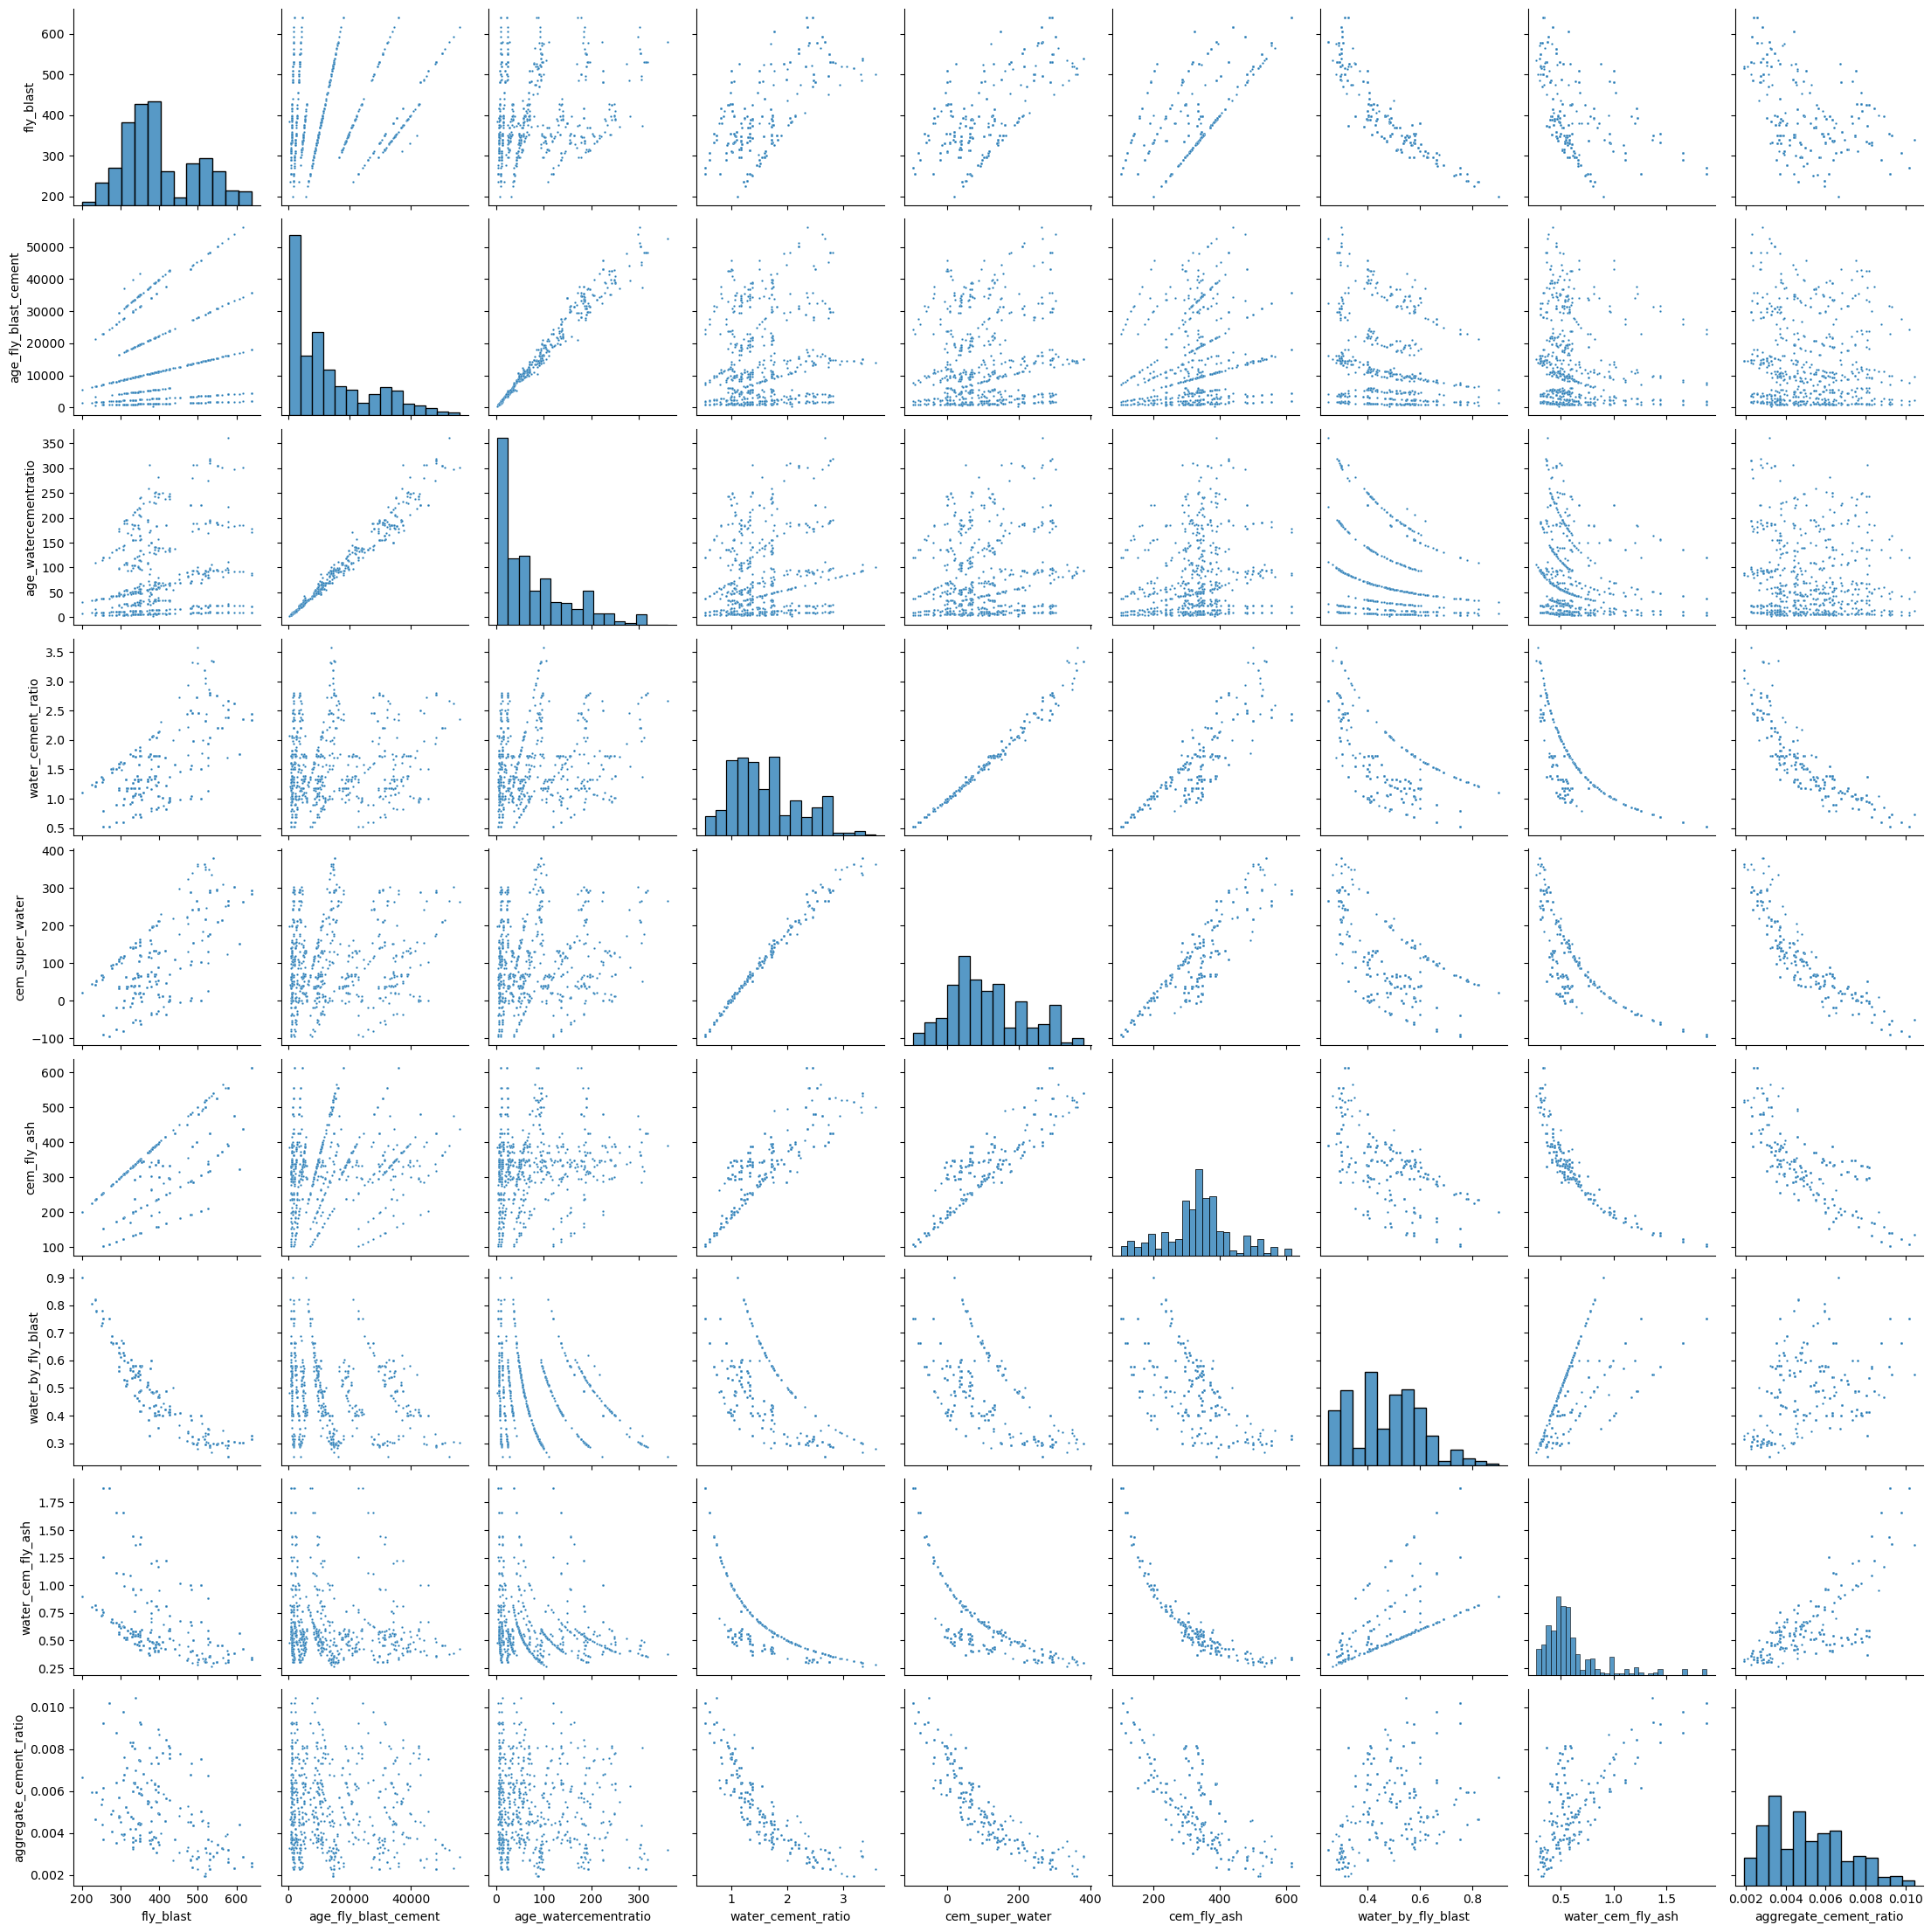

In [73]:
import seaborn as sns
att=["fly_blast",'age_fly_blast_cement',"age_watercementratio","water_cement_ratio","cem_super_water","cem_fly_ash","water_by_fly_blast","water_cem_fly_ash","aggregate_cement_ratio"]
sns.pairplot(data_train[att],plot_kws={"s":3})
plt.show()

In [ ]:
for x in att:
    print(corr_matrix[x].sort_values(ascending=False)) 

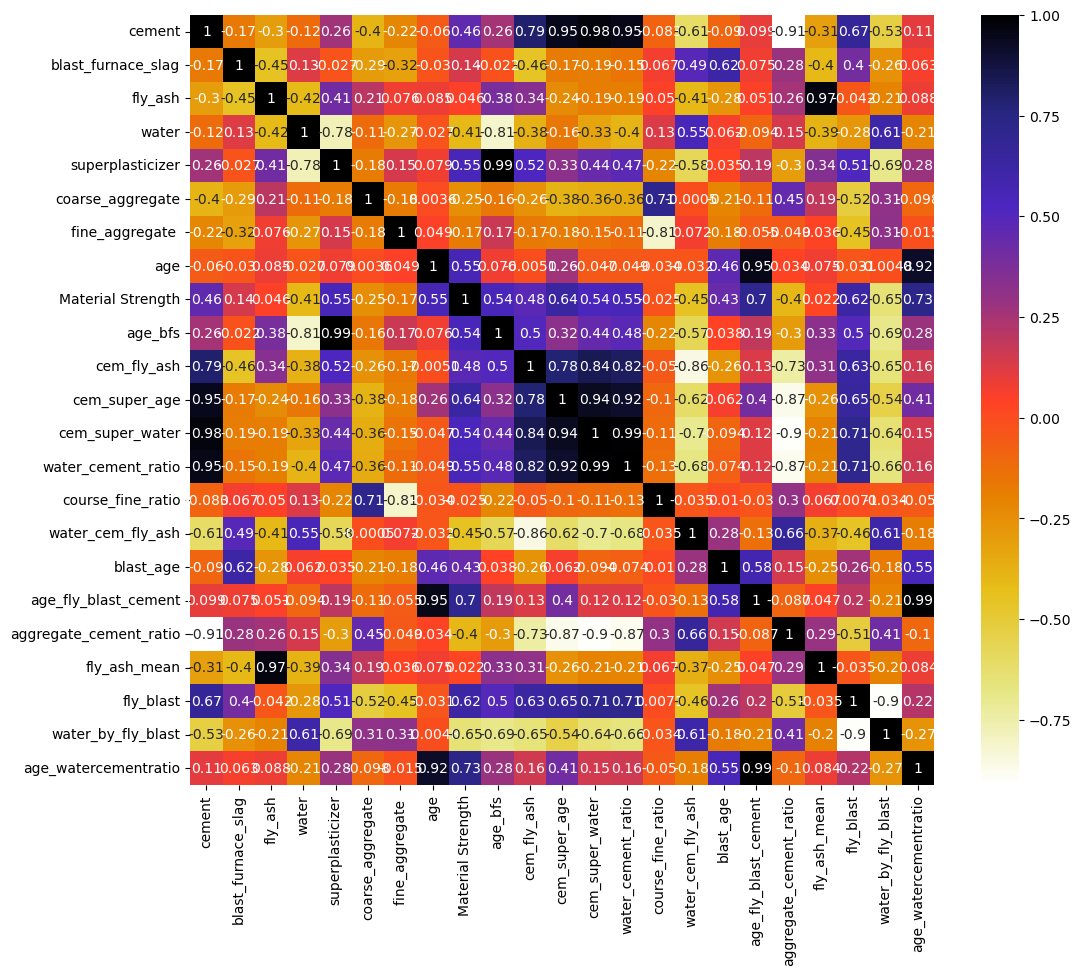

In [74]:
import seaborn as sns
data_train_copy=data_train.copy()
data_train_copy.drop("Material Strength",axis=1)
plt.figure(figsize=(12,10))
cor=data_train_copy.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
# data_train["Material Strength"]

In [ ]:
corr_features=correlation(data_train_copy,0.8)
# corr_features
data_train_final=data_train[list(corr_features)]
data_train_final["Material Strength"]=data_train_copy["Material Strength"]
data_train_final

In [ ]:
# corr_matrix = data_train_final.corr()
# corr_matrix['Material Strength'].sort_values(ascending=False)

In [49]:
data_train_final=scaled_data.copy()
# data_train_final["Material Strength"]

0      0.967485
1      0.741996
2      0.472655
3      0.482372
4      0.522860
         ...   
795    0.742370
796    0.559238
797    0.606827
798    0.658154
799    0.489722
Name: Material Strength, Length: 800, dtype: float64

In [52]:
X_train=data_train_final.drop(["Material Strength"],axis=1)
Y_train=data_train_final["Material Strength"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = (scaler.fit_transform(X_train))

In [53]:
# x_train=X_train.to_numpy()
# x_train

In [54]:
y_train=Y_train.to_numpy()
y_train

array([0.96748474, 0.74199576, 0.47265479, 0.48237199, 0.52286035,
       0.55687056, 0.51538557, 0.4250654 , 0.54217018, 0.46044599,
       0.44524729, 0.32004485, 0.50678959, 0.49831818, 0.56658777,
       0.63012333, 0.46131805, 0.67036253, 0.4762676 , 0.50193098,
       0.49221378, 0.3227856 , 0.07138408, 0.52173913, 0.62526473,
       0.63498194, 0.48361779, 0.62028155, 0.4372742 , 0.45185001,
       0.65939953, 0.63012333, 0.49071882, 0.49582659, 0.63984054,
       0.44948299, 0.34570823, 0.44088701, 0.49707238, 0.42257381,
       0.59960135, 0.51538557, 0.45683319, 0.63249035, 0.48847639,
       0.40799801, 0.15846518, 0.47875919, 0.29811885, 0.37984303,
       0.46655039, 0.55562477, 0.38358042, 0.58377974, 0.15273452,
       0.15335742, 0.49333499, 0.08471409, 0.60570574, 0.38233462,
       0.64843653, 0.61542295, 0.09393298, 0.60209294, 0.57767535,
       0.65690794, 0.52784353, 0.34819983, 0.48000498, 0.8678211 ,
       0.3995266 , 0.32976205, 0.38706864, 0.42319671, 0.33225

Mean Squared Error: 0.011993072848024153
Mean absolute Error: 0.08684623075896705


0.7843941957626397

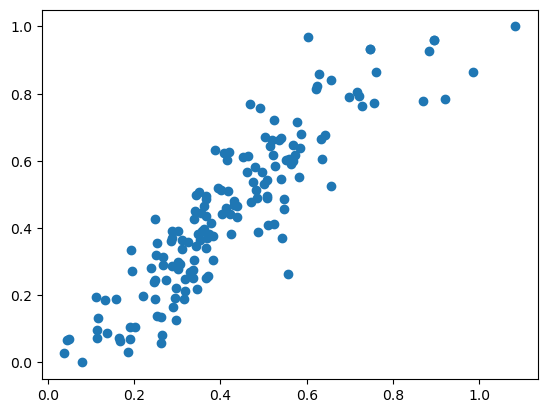

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Generate sample data
np.random.seed(0)
num_samples = 100
num_features = 8

# X = np.random.rand(num_samples, num_features)
# y = 3 * X[:, 0] + 2 * X[:, 1] - 1.5 * X[:, 2] + 0.5 * X[:, 3] + 2.7 * X[:, 4] - 1.2 * X[:, 5] + 0.8 * X[:, 6] - 2 * X[:, 7] + np.random.randn(num_samples)

# Split data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, )
x_train1, x_test1,y_train1, y_test1 = train_test_split(x_train,y_train ,random_state=6, test_size=0.2)

# # Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train1, y_train1)

# Make predictions on the testing data
y_pred = model.predict(x_test1)
# print(y_test.to_numpy())
# print('Predicted :',y_pred)
# print('Actual :',y_test1)
plt.scatter(y_pred,y_test1)



# Calculate mean squared error
mse = mean_squared_error(y_test1, y_pred)
linear_mae = mean_absolute_error(y_test1, y_pred)


# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

print("Mean Squared Error:", mse)
print("Mean absolute Error:", linear_mae)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test.flatten(),y_pred.flatten()))
r2_score(y_test1,y_pred)
# x_test

In [ ]:
x_train1,y_train1

In [ ]:
import numpy as np

class LinearRegression:
	def __init__(self):
		pass

	def __compute(self, x, y):
		try:
			'''
			# multiline code
			var = np.dot(x.T,x)
			var = np.linalg.inv(var)
			var = np.dot(var,x.T)
			var = np.dot(var,y)
			self.__thetas = var
			'''
			# one line code
			self.__thetas = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
		except Exception as e:
			raise e
		
	def fit(self, x, y):
		x = np.array(x)
		ones_ = np.ones(x.shape[0])
		x = np.c_[ones_,x]
		y = np.array(y)
		self.__compute(x,y)

	@property
	def coef_(self):
		return self.__thetas[0]

	@property
	def intercept_(self):
		return self.__thetas[1:]

	def predict(self, x):
		try:
			x = np.array(x)
			ones_ = np.ones(x.shape[0])
			x = np.c_[ones_,x]
			result = np.dot(x,self.__thetas)
			return result			
		except Exception as e:
			raise e

# testing of code...

# datasets
x_train2 = x_train1
y_train2 = y_train1
x_test2 = x_test1
y_test2 = []
y_actual = y_test1

# testing the model...
lr = LinearRegression()
lr.fit(x_train2,y_train2)
print(lr.coef_,lr.intercept_)
# print(lr.predict(x_test2))


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train1, y_train1)

y_pred_tree = model.predict(x_test1)

tree_rmse = mean_squared_error(y_test1, y_pred_tree, squared=False)
tree_mae = mean_absolute_error(y_test1, y_pred_tree)

print("Root Mean Squared Error of Tree Model :", tree_rmse)
print("Mean Absolute Error of Tree Model :", tree_mae)

plt.scatter(y_pred_tree,y_test1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(x_train1, y_train1)

train_pred_forest = forest_model.predict(x_test1)
forest_rmse = mean_squared_error(y_test1, train_pred_forest, squared=False)
forest_mae = mean_absolute_error(y_test1, train_pred_forest)

print("Root Mean Squared Error of Forest Model :", forest_rmse)
print("Mean Absolute Error of Forest Model :", forest_mae)

plt.scatter(train_pred_forest,y_test1)

In [ ]:
x_test1.shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Linear_Regression:
    def __init__(self, X, Y):
        self.X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the intercept term
        self.Y = Y
        self.b = np.zeros(self.X.shape[1])

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b = self.b - (learning_rate * (1/m) * np.dot(Y_pred - Y, self.X))

    def predict(self, X=None):
        if X is None:
            X = self.X
        Y_pred = np.dot(X, self.b)
        return Y_pred

    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1 - np.sum(np.abs(p - e) / e) / n

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / (2 * m)) * np.sum((Y_pred - self.Y) ** 2)
        return J

    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X[:, 1], self.Y, color='b')
        plt.plot(self.X[:, 1], Y_pred, color='g')
        f.show()

def main():
    X = x_test1  # Multivariable input matrix
    Y = y_test1  # Target values

    regressor = Linear_Regression(X, Y)

    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []

    # original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

    while True:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)

        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :", regressor.get_current_accuracy(Y_pred))

            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break

    # final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

    # plot to verify cost function decreases
    # h = plt.figure('Verification')
    # plt.plot(range(iterations), costs, color='b')
    # # plot to verify cost function decreases
    # h = plt.figure('Verification')
    # plt.plot(range(len(costs)), costs, color='b')  # Use len(costs) as the range
    # h.show()

    # h.show()

    # if user wants to predict using the regressor:
    # X_new = np.array([[i, i * 2] for i in range(10)])  # New data points for prediction
    X_new=x_test1
    regressor.predict(X_new)

if __name__ == '__main__':
    main()


In [ ]:
learning_rate=0.01
epochs=2000
np.random.seed(123)
coeff=np.random.rand(len(x_train1[0]))
print("initial values of coefficients:",coeff)

def gD(x,y,coeff,epochs,learning_rate):
    N=len(y)
    past_costs=[]
    past_coeff=[coeff]
    for i in range(epochs):
        prediction=np.dot(x,coeff)
        error=prediction-y
        cost=1/(2*N)*np.dot(error.T,error)
        past_costs.append(cost)
        der=(1/N)*learning_rate*np.dot(x.T,error)
        coeff=coeff-der
        past_coeff.append(coeff)
    return past_coeff,past_costs

past_coeff,past_costs=gD(x_test1,y_test1,coeff,epochs,learning_rate)
coeff=past_coeff[-1]
coeff
# # Implementation of gradient descent in linear regression
# import numpy as np
# import matplotlib.pyplot as plt


# class Linear_Regression:
# 	def __init__(self, X, Y):
# 		self.X = X
# 		self.Y = Y
# 		self.b = [0, 0]

# 	def update_coeffs(self, learning_rate):
# 		Y_pred = self.predict()
# 		Y = self.Y
# 		m = len(Y)
# 		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
# 												np.sum(Y_pred - Y)))

# 		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
# 												np.sum((Y_pred - Y) * self.X)))

# 	def predict(self, X=[]):
# 		Y_pred = np.array([])
# 		if not X:
# 			X = self.X
# 		b = self.b
# 		for x in X:
# 			Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

# 		return Y_pred

# 	def get_current_accuracy(self, Y_pred):
# 		p, e = Y_pred, self.Y
# 		n = len(Y_pred)
# 		return 1-sum([-11.60141819,   3.57386255,  15.93778795,  -2.14166481,
         # 5.06200079,   5.23787156,  -0.55730675,  -2.04755014,
         # 2.64087135,
# 			[
# 				abs(p[i]-e[i])/e[i]
# 				for i in range(n)
# 				if e[i] != 0]
# 		)/n
# 	# def predict(self, b, yi):

# 	def compute_cost(self, Y_pred):
# 		m = len(self.Y)
# 		J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
# 		return J

# 	def plot_best_fit(self, Y_pred, fig):
# 		f = plt.figure(fig)
# 		plt.scatter(self.X, self.Y, color='b')
# 		plt.plot(self.X, Y_pred, color='g')
# 		f.show()


# def main():
# 	X = x_test1
# 	Y = y_test1
# 	regressor = Linear_Regression(X, Y)
# 	iterations = 0
# 	steps = 100
# 	learning_rate = 0.01
# 	costs = []

# 	# original best-fit line
# 	Y_pred = regressor.predict()
# 	regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

# 	while 1:
# 		Y_pred = regressor.predict()
# 		cost = regressor.compute_cost(Y_pred)
# 		costs.append(cost)
# 		regressor.update_coeffs(learning_rate)

# 		iterations += 1
# 		if iterations % steps == 0:
# 			print(iterations, "epochs elapsed")
# 			print("Current accuracy is :",
# 				regressor.get_current_accuracy(Y_pred))

# 			stop = input("Do you want to stop (y/*)??")
# 			if stop == "y":
# 				break

# 	# final best-fit line
# 	regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

# 	# plot to verify cost function decreases
# 	h = plt.figure('Verification')
# 	plt.plot(range(iterations), costs, color='b')
# 	h.show()

# 	# if user wants to predict using the regressor:
# 	regressor.predict([i for i in range(10)])


# if __name__ == '__main__':
# 	main()
np.matmul(x_test1,coeff),y_test1
# y_pred=x_train1*(coeff.T)
# y_pred

In [ ]:
plt.title("cost function")
plt.xlabel("No of iterations")
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()